In [16]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from random import seed
from random import randint
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm
tqdm.pandas()

%autosave 30
# this line outosaves the notebook every 15 seconds

# seed random number generator
# seed(1)



Autosaving every 30 seconds


# Load and Clean Data



In [17]:
# Load the data
# 'skus' table
skus = pd.read_csv("JD_sku_data.csv")
# 'users' table
users = pd.read_csv("JD_user_data.csv")
# 'clicks' table
clicks = pd.read_csv("JD_click_data.csv")
# 'orders' table
orders = pd.read_csv("JD_order_data.csv")


########## REMOVE ME ##########
# TESTING: TO MAKE A SAMPLE OF THE DATA OF 1 MILLION ROWS
# clicks = clicks.iloc[:1000000]
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20214515 entries, 0 to 20214514
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   sku_ID        object
 1   user_ID       object
 2   request_time  object
 3   channel       object
dtypes: object(4)
memory usage: 616.9+ MB


In [18]:
# Cleaning the data and removing the duplicates
clicks_o1_s1 = pd.read_csv(
    "clicks_o1_s1.csv",
    dtype={
        "sku_ID": "string",
        "user_ID": "string",
        "channel": "string",
    },
    parse_dates=["request_time", "click_t"]
)
del clicks_o1_s1["click_t_seconds"]
#________________________________________________________________________
display(clicks_o1_s1)
clicks_o1_s1.info()

,sku_ID,user_ID,request_time,channel,click_t
0,09b70fcd83,2791ec4485,2018-03-01 22:10:51,wechat,2018-03-01 22:10:51
1,09b70fcd83,9568fb8647,2018-03-01 15:04:20,wechat,2018-03-01 15:04:20
2,09b70fcd83,2791ec4485,2018-03-01 13:50:40,wechat,2018-03-01 13:50:40
3,09b70fcd83,2791ec4485,2018-03-01 13:53:56,wechat,2018-03-01 13:53:56
4,09b70fcd83,2791ec4485,2018-03-01 13:51:59,wechat,2018-03-01 13:51:59
...,...,...,...,...,...
4784713,7b57d0fc68,8047d9d7ca,2018-03-31 09:23:26,pc,2018-03-31 09:23:26
4784714,7b57d0fc68,8047d9d7ca,2018-03-31 09:27:21,pc,2018-03-31 09:27:21
4784715,750af30820,58257aade8,2018-03-31 14:25:29,pc,2018-03-31 14:25:29
4784716,34ff571ca4,012dd02457,2018-03-31 10:13:52,pc,2018-03-31 10:13:52


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784718 entries, 0 to 4784717
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   sku_ID        string        
 1   user_ID       string        
 2   request_time  datetime64[ns]
 3   channel       string        
 4   click_t       datetime64[ns]
dtypes: datetime64[ns](2), string(3)
memory usage: 182.5 MB


In [19]:
# Cleaning the data and removing the duplicates
orders_o1_s1 = pd.read_csv(
    "orders_o1_s1.csv",
    dtype={
        "order_ID": "string",
        "user_ID": "string",
        "sku_ID": "string",
    },
    parse_dates=["order_time"]
)
orders_o1_s1['order_time'] = pd.to_datetime(orders_o1_s1.order_time, format='ISO8601')
del orders_o1_s1["order_date"]
#________________________________________________________________________
display(orders_o1_s1)
orders_o1_s1.info()

,order_ID,user_ID,sku_ID,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,discount
0,7444318d01,33a9e56257,067b673f2b,2018-03-01 11:10:40,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28,46.0
1,d43a33c38a,4829223b6f,623d0a582a,2018-03-01 19:13:37,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16,25.0
2,e0f5386d87,0b07cae293,589c2b865b,2018-03-01 21:09:15,1,1,1,79.9,38.9,4.0,37.0,0.0,0.0,0,3,16,41.0
3,252f6bbde1,010dc4d911,4fe57b6fb2,2018-03-01 20:59:13,1,2,-,238.0,213.0,25.0,0.0,0.0,0.0,0,5,16,25.0
4,9f05ee65b1,80210d9643,067b673f2b,2018-03-01 14:45:22,2,1,1,99.9,48.4,5.0,46.5,0.0,0.0,0,3,16,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339846,3ad06b9fbe,a27b3ed4d4,a9109972d1,2018-03-31 01:22:47,1,2,-,0.0,-1.0,0.0,0.0,0.0,1.0,1,2,2,1.0
339847,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31 08:55:57,1,1,3,118.0,55.0,63.0,0.0,0.0,0.0,0,59,2,63.0
339848,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31 13:31:01,1,1,2,78.0,78.0,0.0,0.0,0.0,0.0,0,2,2,0.0
339849,be3a9414b1,20ba6655f3,2dd6b818ec,2018-03-31 12:51:18,1,2,-,189.0,78.0,111.0,0.0,0.0,0.0,0,4,28,111.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339851 entries, 0 to 339850
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_ID                    339851 non-null  string        
 1   user_ID                     339851 non-null  string        
 2   sku_ID                      339851 non-null  string        
 3   order_time                  339851 non-null  datetime64[ns]
 4   quantity                    339851 non-null  int64         
 5   type                        339851 non-null  int64         
 6   promise                     339851 non-null  object        
 7   original_unit_price         339851 non-null  float64       
 8   final_unit_price            339851 non-null  float64       
 9   direct_discount_per_unit    339851 non-null  float64       
 10  quantity_discount_per_unit  339851 non-null  float64       
 11  bundle_discount_per_unit    339851 non-

In [20]:
# Cleaning the data and removing the duplicates
users_o1_s1 = pd.read_csv(
    "users_o1_s1.csv",
    dtype={
        "user_ID": "string"
    }
)
#________________________________________________________________________
display(users_o1_s1)
users_o1_s1.info()

,user_ID,clicks_count,unique_clicks_count,orders_count,unique_orders_count,unique_skus_ordered
0,f05e5ac135,761,173,1,1,1
1,709583e944,728,95,1,1,1
2,7029bd1f7b,689,101,1,1,1
3,9c64f623ea,639,128,1,1,1
4,d8aa505c87,627,222,1,1,1
...,...,...,...,...,...,...
336347,61020e1a82,1,1,1,1,1
336348,68670f69ba,1,1,1,1,1
336349,8e92bd5100,1,1,1,1,1
336350,813b312a5e,1,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336352 entries, 0 to 336351
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_ID              336352 non-null  string
 1   clicks_count         336352 non-null  int64 
 2   unique_clicks_count  336352 non-null  int64 
 3   orders_count         336352 non-null  int64 
 4   unique_orders_count  336352 non-null  int64 
 5   unique_skus_ordered  336352 non-null  int64 
dtypes: int64(5), string(1)
memory usage: 15.4 MB


In [21]:
# Cleaning the data and removing the duplicates
clicks_users_zero_order = pd.read_csv(
    "clicks_users_zero_order.csv",
    dtype={
        "sku_ID": "string",
        "user_ID": "string",
        "channel": "string",
    },
    parse_dates=["request_time"]
)
#________________________________________________________________________
display(clicks_users_zero_order)
clicks_users_zero_order.info()

,sku_ID,user_ID,request_time,channel
0,a234e08c57,4c3d6d10c2,2018-03-01 23:57:53,wechat
1,09b70fcd83,eb0718c1c9,2018-03-01 16:34:08,wechat
2,09b70fcd83,59f84cf342,2018-03-01 22:20:35,wechat
3,09b70fcd83,59f84cf342,2018-03-01 22:20:01,wechat
4,09b70fcd83,59f84cf342,2018-03-01 22:19:11,wechat
...,...,...,...,...
11728031,904fbf8b97,654cdf01f2,2018-03-31 08:41:55,others
11728032,5f58bfd286,904ede5908,2018-03-31 21:59:17,others
11728033,5f58bfd286,cd789954ed,2018-03-31 07:35:05,others
11728034,019dedb453,9b1fde91de,2018-03-31 07:07:26,others


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11728036 entries, 0 to 11728035
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   sku_ID        string        
 1   user_ID       string        
 2   request_time  datetime64[ns]
 3   channel       string        
dtypes: datetime64[ns](1), string(3)
memory usage: 357.9 MB


# ID Session Implementation for Users with and withOUT A Purchase:
1. Number of click sessions 
2. Total number of clicks across sessions
3. Total number of unique SKUs clicked across sessions 
4. Average Number of clicks per session for a user
5. Average number of unique SKUs clicked per session 
6. (Less priority) Total number of channels clicked across sessions
7. (Less priority) Average number of channels clicked per session
8. Time between click sessions

### Creating click_sessions_with_purchase and click_sessions_without_purchase DF using clicks_o1_s1

In [60]:
# With Purchase
# USE DIFF FUNCTION AND TIME DIFF == 1H:

# Sorting is needed, otherwise .diff() will output wrong results
click_sessions_with_purchase = clicks_o1_s1.sort_values(["user_ID","request_time"]) # order request_time clicks from earliest to oldest (final)

# Timestamp diff in seconds
diff_timestamp = click_sessions_with_purchase.groupby('user_ID')['request_time'].diff()
click_sessions_with_purchase["diff_grouped_request_time"] = diff_timestamp
# indexes where new session_id will be created (single click request per user_ID or pause > 1 hour)
new_session = (diff_timestamp.isnull()) | (diff_timestamp > datetime.timedelta(hours=1))

# Create unique session_id for every user
click_sessions_with_purchase['session_id'] = click_sessions_with_purchase.loc[new_session, ['user_ID', 'request_time']] \
                        .groupby('user_ID').rank(method='first').astype(int)

# Propagate last valid observation forward (replace NaN)
click_sessions_with_purchase['session_id'] = click_sessions_with_purchase['session_id'].fillna(method='ffill').astype(int)

click_sessions_with_purchase

/var/folders/r7/8vd8x98935g_j6xjscspbwr80000gn/T/ipykernel_43551/1056381271.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  click_sessions_with_purchase['session_id'] = click_sessions_with_purchase['session_id'].fillna(method='ffill').astype(int)


,sku_ID,user_ID,request_time,channel,click_t,diff_grouped_request_time,session_id
2149132,9ac31152dd,000089d6a6,2018-03-14 14:37:08,app,2018-03-14 14:37:08,NaT,1
2205131,e99eb7d131,000089d6a6,2018-03-14 14:37:13,app,2018-03-14 14:37:13,0 days 00:00:05,1
2205130,e99eb7d131,000089d6a6,2018-03-14 14:37:31,app,2018-03-14 14:37:31,0 days 00:00:18,1
2205126,e99eb7d131,000089d6a6,2018-03-14 14:40:48,app,2018-03-14 14:40:48,0 days 00:03:17,1
2205127,e99eb7d131,000089d6a6,2018-03-14 14:41:34,app,2018-03-14 14:41:34,0 days 00:00:46,1
...,...,...,...,...,...,...,...
3432285,4e5e5c04a2,ffffb20ef7,2018-03-24 14:00:52,app,2018-03-24 14:00:52,0 days 00:02:44,1
3432282,4e5e5c04a2,ffffb20ef7,2018-03-24 14:04:09,app,2018-03-24 14:04:09,0 days 00:03:17,1
3432284,4e5e5c04a2,ffffb20ef7,2018-03-24 14:05:46,app,2018-03-24 14:05:46,0 days 00:01:37,1
2504209,5c4440c9d2,ffffc45330,2018-03-17 15:30:28,wechat,2018-03-17 15:30:28,NaT,1


In [61]:
# Without Purchase
# USE DIFF FUNCTION AND TIME DIFF == 1H:

# Sorting is needed, otherwise .diff() will output wrong results
click_sessions_without_purchase = clicks_users_zero_order.sort_values(["user_ID","request_time"]) # order request_time clicks from earliest to oldest (final)

# Timestamp diff in seconds
diff_timestamp = click_sessions_without_purchase.groupby('user_ID')['request_time'].diff()
click_sessions_without_purchase["diff_grouped_request_time"] = diff_timestamp
# indexes where new session_id will be created (single click request per user_ID or pause > 1 hour)
new_session = (diff_timestamp.isnull()) | (diff_timestamp > datetime.timedelta(hours=1))

# Create unique session_id for every user
click_sessions_without_purchase['session_id'] = click_sessions_without_purchase.loc[new_session, ['user_ID', 'request_time']] \
                        .groupby('user_ID').rank(method='first').astype(int)

# Propagate last valid observation forward (replace NaN)
click_sessions_without_purchase['session_id'] = click_sessions_without_purchase['session_id'].fillna(method='ffill').astype(int)

click_sessions_without_purchase

/var/folders/r7/8vd8x98935g_j6xjscspbwr80000gn/T/ipykernel_43551/1925197235.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  click_sessions_without_purchase['session_id'] = click_sessions_without_purchase['session_id'].fillna(method='ffill').astype(int)


,sku_ID,user_ID,request_time,channel,diff_grouped_request_time,session_id
10877425,d6da3b2341,00000e0594,2018-03-30 11:00:17,wechat,NaT,1
10815027,93f9bac4b8,00000e0594,2018-03-30 11:25:24,wechat,0 days 00:25:07,1
10815028,93f9bac4b8,00000e0594,2018-03-30 11:25:59,wechat,0 days 00:00:35,1
244858,ed7a6a7cd7,000014394e,2018-03-01 17:58:57,app,NaT,1
244859,ed7a6a7cd7,000014394e,2018-03-01 17:59:30,app,0 days 00:00:33,1
...,...,...,...,...,...,...
2593095,7e4cb4952a,fffffa3a9d,2018-03-07 23:06:25,app,0 days 00:00:15,1
2414944,068f4481b3,fffffa3a9d,2018-03-07 23:07:40,app,0 days 00:01:15,1
2593097,7e4cb4952a,fffffa3a9d,2018-03-07 23:07:40,app,0 days 00:00:00,1
2713609,187f5f0e3e,fffffa3a9d,2018-03-07 23:08:19,app,0 days 00:00:39,1


### 1. Number of click sessions

In [62]:
unique_session_id_with_purchase = click_sessions_with_purchase['session_id'].nunique()
unique_session_id_without_purchase = click_sessions_without_purchase['session_id'].nunique()

unique_session_id_with_purchase, unique_session_id_without_purchase


(93, 144)

In [66]:
click_sessions_with_purchase["session_id"].value_counts()

session_id
1     2216541
2      988610
3      543381
4      328912
5      203692
       ...   
89          2
87          1
90          1
92          1
93          1
Name: count, Length: 93, dtype: int64

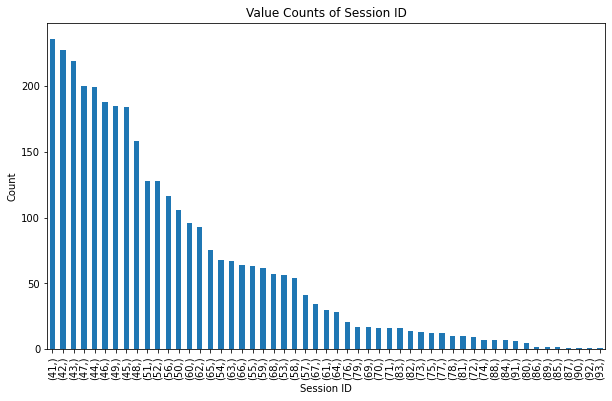

In [70]:
import matplotlib.pyplot as plt

session_counts = click_sessions_with_purchase.loc[click_sessions_with_purchase["session_id"] > 40, ["session_id"]].value_counts()

plt.figure(figsize=(10, 6))
session_counts.plot(kind='bar')
plt.xlabel('Session ID')
plt.ylabel('Count')
plt.title('Value Counts of Session ID')
plt.show()

### 2. Total number of clicks across sessions 


In [11]:
number_of_click_sessions_with_purchase = click_sessions_with_purchase['session_id'].value_counts()
number_of_click_sessions_without_purchase = click_sessions_without_purchase['session_id'].value_counts()
print("with_purchase\n", number_of_click_sessions_with_purchase)
print("without_purchase\n", number_of_click_sessions_without_purchase)


with_purchase
 session_id
1     2216541
2      988610
3      543381
4      328912
5      203692
       ...   
89          2
87          1
90          1
92          1
93          1
Name: count, Length: 93, dtype: int64
without_purchase
 session_id
1      6700785
2      2197260
3      1038544
4       569924
5       342564
        ...   
139          3
142          3
133          2
143          2
141          1
Name: count, Length: 144, dtype: int64


<Axes: xlabel='session_id'>

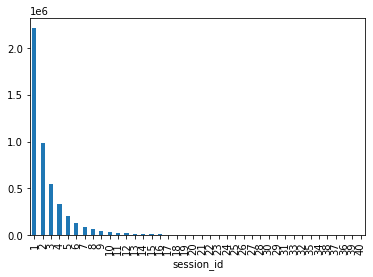

In [12]:
click_sessions_with_purchase['session_id'].value_counts().head(40).plot(kind='bar')


<Axes: xlabel='session_id'>

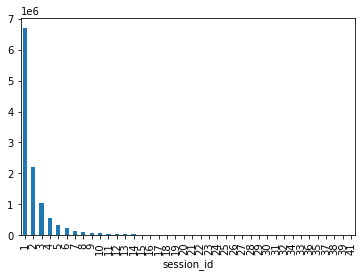

In [13]:
click_sessions_without_purchase['session_id'].value_counts().head(40).plot(kind='bar')

### 3. Total number of unique SKUs clicked across sessions 

In [29]:
number_of_sku_in_click_sessions_with_purchase = click_sessions_with_purchase.groupby(["user_ID", 'session_id'])["sku_ID"].nunique()
number_of_sku_in_click_sessions_without_purchase = click_sessions_without_purchase.groupby(["user_ID", 'session_id'])["sku_ID"].nunique()
print("with_purchase\n", number_of_sku_in_click_sessions_with_purchase.tail(40))
print("without_purchase\n", number_of_sku_in_click_sessions_without_purchase.tail(40))


with_purchase
 user_ID     session_id
fffce2f1a7  1              8
            2              2
            3              1
            4              1
            5              1
            6              1
            7              1
            8             11
            9              1
            10             2
            11             1
            12             1
            13             1
            14             4
            15             1
            16             1
fffcf65523  1              1
            2              1
            3              2
            4              1
fffd332611  1              3
fffd47f506  1              2
fffd68e323  1              3
            2              1
fffd8aaceb  1              1
            2              1
fffe15f2c8  1              4
            2              1
            3              1
            4              3
fffe81ce8f  1              1
fffece9f0b  1              1
            2              6
fffed

In [30]:
number_of_sku_in_click_sessions_with_purchase.loc["fffce2f1a7", :]

session_id
1      8
2      2
3      1
4      1
5      1
6      1
7      1
8     11
9      1
10     2
11     1
12     1
13     1
14     4
15     1
16     1
Name: sku_ID, dtype: int64

### 4. Average Number of clicks per session for a user


In [51]:
avg_num_of_clicks_in_click_sessions_with_purchase = click_sessions_with_purchase.groupby(['session_id', "user_ID"]).size()
avg_num_of_clicks_in_click_sessions_with_purchase = avg_num_of_clicks_in_click_sessions_with_purchase.groupby(['session_id']).mean()
avg_num_of_clicks_in_click_sessions_with_purchase

session_id
1     6.589944
2     5.165421
3     4.840078
4     4.763251
5     4.577657
        ...   
89    2.000000
90    1.000000
91    6.000000
92    1.000000
93    1.000000
Length: 93, dtype: float64

In [52]:
avg_num_of_clicks_in_click_sessions_without_purchase = click_sessions_without_purchase.groupby(['session_id', "user_ID"]).size()
avg_num_of_clicks_in_click_sessions_without_purchase = avg_num_of_clicks_in_click_sessions_without_purchase.groupby(['session_id']).mean()
avg_num_of_clicks_in_click_sessions_without_purchase

session_id
1       3.097714
2       3.412149
3       3.607396
4       3.700589
5       3.739618
         ...    
140    17.000000
141     1.000000
142     3.000000
143     2.000000
144     4.000000
Length: 144, dtype: float64

<Axes: xlabel='session_id'>

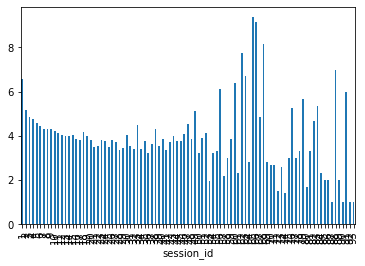

In [53]:
avg_num_of_clicks_in_click_sessions_with_purchase.plot(kind='bar')

<Axes: xlabel='session_id'>

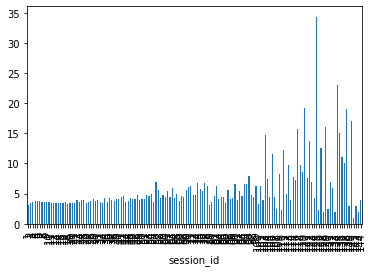

In [54]:
avg_num_of_clicks_in_click_sessions_without_purchase.plot(kind='bar')

### 5. Average number of unique SKUs clicked per session

In [55]:
avg_num_of_unique_sku_in_click_sessions_with_purchase = click_sessions_with_purchase.groupby(['session_id', "user_ID"])["sku_ID"].nunique()
avg_num_of_unique_sku_in_click_sessions_with_purchase = avg_num_of_unique_sku_in_click_sessions_with_purchase.groupby(['session_id']).mean()
avg_num_of_unique_sku_in_click_sessions_with_purchase

session_id
1     2.898633
2     2.379158
3     2.260816
4     2.247683
5     2.206441
        ...   
89    2.000000
90    1.000000
91    1.000000
92    1.000000
93    1.000000
Name: sku_ID, Length: 93, dtype: float64

In [56]:
avg_num_of_unique_sku_in_click_sessions_without_purchase = click_sessions_without_purchase.groupby(['session_id', "user_ID"])["sku_ID"].nunique()
avg_num_of_unique_sku_in_click_sessions_without_purchase = avg_num_of_unique_sku_in_click_sessions_without_purchase.groupby(['session_id']).mean()
avg_num_of_unique_sku_in_click_sessions_without_purchase

session_id
1      1.885227
2      2.014928
3      2.102448
4      2.154718
5      2.169097
         ...   
140    4.000000
141    1.000000
142    2.000000
143    2.000000
144    2.000000
Name: sku_ID, Length: 144, dtype: float64

<Axes: xlabel='session_id'>

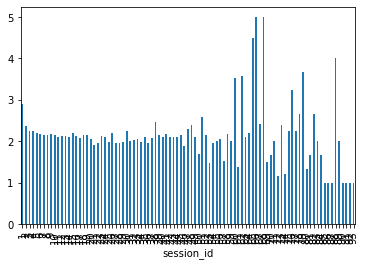

In [57]:
avg_num_of_unique_sku_in_click_sessions_with_purchase.plot(kind='bar')

<Axes: xlabel='session_id'>

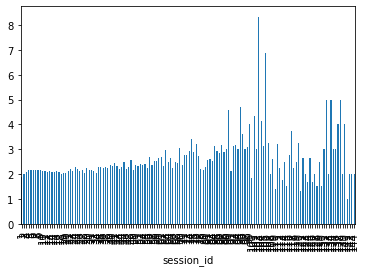

In [58]:
avg_num_of_unique_sku_in_click_sessions_without_purchase.plot(kind='bar')


### 6. (Less priority) Total number of channels clicked across sessions

### 7. (Less priority) Average number of channels clicked per session

In [64]:
num_of_unique_channels_in_click_sessions_with_purchase = click_sessions_with_purchase.groupby(['session_id', "user_ID"])["channel"].nunique()
num_of_unique_channels_in_click_sessions_with_purchase = num_of_unique_channels_in_click_sessions_with_purchase.groupby(['session_id']).mean()
num_of_unique_channels_in_click_sessions_with_purchase

session_id
1     1.027352
2     1.015560
3     1.012942
4     1.011339
5     1.010697
        ...   
89    1.000000
90    1.000000
91    1.000000
92    1.000000
93    1.000000
Name: channel, Length: 93, dtype: float64

In [62]:
num_of_unique_channels_in_click_sessions_without_purchase = click_sessions_without_purchase.groupby(['session_id', "user_ID"])["channel"].nunique()
num_of_unique_channels_in_click_sessions_without_purchase = num_of_unique_channels_in_click_sessions_without_purchase.groupby(['session_id']).mean()
num_of_unique_channels_in_click_sessions_without_purchase

session_id
1      1.011347
2      1.010167
3      1.010275
4      1.010655
5      1.011244
         ...   
140    1.000000
141    1.000000
142    1.000000
143    1.000000
144    1.000000
Name: channel, Length: 144, dtype: float64

<Axes: xlabel='session_id'>

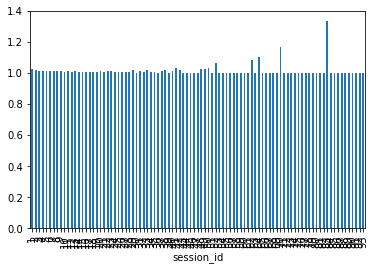

In [65]:
num_of_unique_channels_in_click_sessions_with_purchase.plot(kind='bar')

<Axes: xlabel='session_id'>

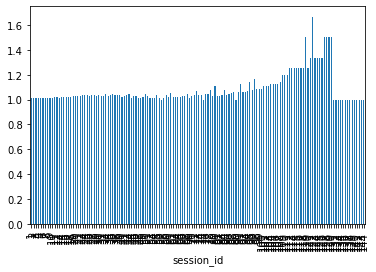

In [66]:
num_of_unique_channels_in_click_sessions_without_purchase.plot(kind='bar')

### 8. Time between click sessions

In [39]:
# WITH PURCHASE
# DESCRIBE the time between clicks sessions for each user:

# Group by 'user_ID' and 'click_session_ID' and calculate the first and last request time
pause_duration_between_click_sessions_with_purchase = click_sessions_with_purchase.groupby(["user_ID", "session_id"])['request_time'].agg(['first', 'last'])

# Flatten the DataFrame. Convert the multi-index columns to flat columns!
pause_duration_between_click_sessions_with_purchase.reset_index(inplace=True)

# Calculate the time difference between sessions ignoring the time difference between different user_IDs: 
pause_duration_between_click_sessions_with_purchase['next_session_start'] = pause_duration_between_click_sessions_with_purchase.groupby('user_ID')['first'].shift(-1) # shift the first request time to the next session first row
pause_duration_between_click_sessions_with_purchase['time_diff'] = pause_duration_between_click_sessions_with_purchase['next_session_start'] - pause_duration_between_click_sessions_with_purchase['last']

# Ensure the time difference is only calculated within the same user_ID
pause_duration_between_click_sessions_with_purchase['next_user_ID'] = pause_duration_between_click_sessions_with_purchase['user_ID'].shift(-1)
pause_duration_between_click_sessions_with_purchase.loc[pause_duration_between_click_sessions_with_purchase['user_ID'] != pause_duration_between_click_sessions_with_purchase['next_user_ID'], 'time_diff'] = pd.NaT

# Drop unnecessary columns and NaN values
pause_duration_between_click_sessions_with_purchase.drop(columns=['next_session_start', 'next_user_ID'], inplace=True)
pause_duration_between_click_sessions_with_purchase = pause_duration_between_click_sessions_with_purchase.dropna()

# Convert the time difference to hours
pause_duration_between_click_sessions_with_purchase['time_diff'] = pause_duration_between_click_sessions_with_purchase['time_diff'].dt.total_seconds() / 3600

# Describe the time difference
pause_duration_between_click_sessions_with_purchase.groupby(["session_id"])['time_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
session_id,,,,,,,,
1,191390.0,73.765231,113.844838,1.000278,7.854167,24.406389,87.263542,734.814167
2,112267.0,62.832569,99.657915,1.000278,7.280278,22.870556,70.731389,728.167778
3,69052.0,58.667986,93.223095,1.000278,7.069931,22.241528,65.941528,718.703333
4,44497.0,56.191911,88.510137,1.001389,7.157500,21.965556,63.138889,717.989722
5,29799.0,52.625827,83.036760,1.001389,6.924861,21.118333,57.265972,692.717778
...,...,...,...,...,...,...,...,...
88,1.0,10.860000,NaN,10.860000,10.860000,10.860000,10.860000,10.860000
89,1.0,8.448056,NaN,8.448056,8.448056,8.448056,8.448056,8.448056
90,1.0,7.207778,NaN,7.207778,7.207778,7.207778,7.207778,7.207778


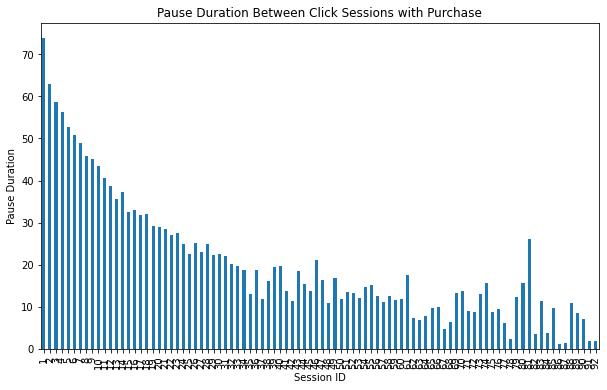

In [40]:
import matplotlib.pyplot as plt

# Group the data by session ID and calculate the mean pause duration
grouped_data = pause_duration_between_click_sessions_with_purchase.groupby(["session_id"])['time_diff'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.xlabel('Session ID')
plt.ylabel('Pause Duration')
plt.title('Pause Duration Between Click Sessions with Purchase')
plt.show()


In [41]:
# WITHOUT PURCHASE
# DESCRIBE the time between clicks sessions for each user:

# Group by 'user_ID' and 'click_session_ID' and calculate the first and last request time
pause_duration_between_click_sessions_without_purchase = click_sessions_without_purchase.groupby(["user_ID", "session_id"])['request_time'].agg(['first', 'last'])

# Flatten the DataFrame. Convert the multi-index columns to flat columns!
pause_duration_between_click_sessions_without_purchase.reset_index(inplace=True)

# Calculate the time difference between sessions ignoring the time difference between different user_IDs: 
pause_duration_between_click_sessions_without_purchase['next_session_start'] = pause_duration_between_click_sessions_without_purchase.groupby('user_ID')['first'].shift(-1) # shift the first request time to the next session first row
pause_duration_between_click_sessions_without_purchase['time_diff'] = pause_duration_between_click_sessions_without_purchase['next_session_start'] - pause_duration_between_click_sessions_with_purchase['last']

# Ensure the time difference is only calculated within the same user_ID
pause_duration_between_click_sessions_without_purchase['next_user_ID'] = pause_duration_between_click_sessions_without_purchase['user_ID'].shift(-1)
pause_duration_between_click_sessions_without_purchase.loc[pause_duration_between_click_sessions_without_purchase['user_ID'] != pause_duration_between_click_sessions_without_purchase['next_user_ID'], 'time_diff'] = pd.NaT

# Drop unnecessary columns and NaN values
pause_duration_between_click_sessions_without_purchase.drop(columns=['next_session_start', 'next_user_ID'], inplace=True)
pause_duration_between_click_sessions_without_purchase = pause_duration_between_click_sessions_without_purchase.dropna()

# Convert the time difference to hours
pause_duration_between_click_sessions_without_purchase['time_diff'] = pause_duration_between_click_sessions_without_purchase['time_diff'].dt.total_seconds() / 3600

# Describe the time difference
pause_duration_between_click_sessions_without_purchase.groupby(["session_id"])['time_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
session_id,,,,,,,,
1,96572.0,58.915390,310.179417,-729.510000,-154.101042,57.686944,289.550000,740.380278
2,43390.0,83.355478,305.777495,-732.102500,-124.517917,82.733611,312.878889,740.418056
3,23267.0,96.882115,301.890369,-716.566667,-106.080139,96.323889,326.366389,738.664167
4,13627.0,111.722130,299.694881,-709.951389,-92.249444,115.143333,339.380972,732.327778
5,8852.0,120.400321,295.361207,-715.163056,-75.621111,121.796806,348.178611,733.811944
...,...,...,...,...,...,...,...,...
79,5.0,460.945111,212.282584,115.996389,419.193889,514.448333,603.562500,651.524444
80,4.0,563.476875,58.519298,511.329444,527.320486,548.927500,585.083889,644.723056
81,4.0,568.700069,47.769365,510.801667,538.863542,577.531111,607.367639,608.936389


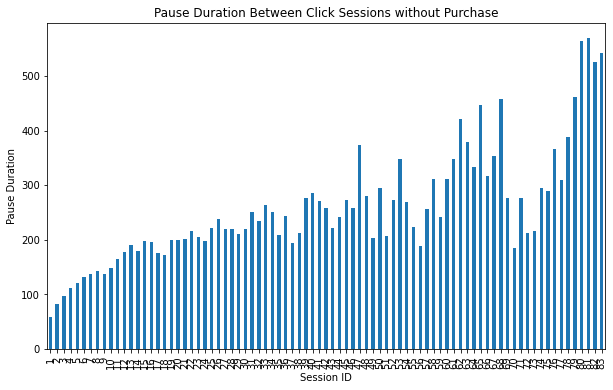

In [43]:
import matplotlib.pyplot as plt

# Group the data by session ID and calculate the mean pause duration
grouped_data = pause_duration_between_click_sessions_without_purchase.groupby(["session_id"])['time_diff'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.xlabel('Session ID')
plt.ylabel('Pause Duration')
plt.title('Pause Duration Between Click Sessions without Purchase')
plt.show()


Insight: The pause duration of users who purchase and thouse who do not is inversed!!!

In [46]:
pause_duration_between_click_sessions_with_purchase["session_id"].value_counts().head(60)

session_id
1     191390
2     112267
3      69052
4      44497
5      29799
6      20531
7      14648
8      10731
9       8105
10      6203
11      4835
12      3803
13      3072
14      2492
15      2049
16      1693
17      1429
18      1212
19      1024
20       864
21       761
22       660
23       566
24       493
25       429
26       373
27       326
28       295
29       257
30       227
31       201
32       177
33       154
34       142
35       123
36       114
37       102
38        89
39        80
40        70
41        61
42        55
43        53
44        49
45        46
46        44
47        41
48        36
49        33
50        33
51        31
52        29
53        21
54        19
55        19
56        19
57        18
58        16
59        15
60        13
Name: count, dtype: int64

In [47]:
pause_duration_between_click_sessions_without_purchase["session_id"].value_counts().head(60)

session_id
1     96572
2     43390
3     23267
4     13627
5      8852
6      5902
7      4181
8      2971
9      2184
10     1706
11     1358
12     1074
13      872
14      729
15      584
16      498
17      439
18      347
19      318
20      273
21      221
22      203
23      181
24      148
25      137
26      129
27      126
28      110
29      104
30       88
31       78
32       76
34       60
33       58
35       50
37       47
36       42
39       40
41       38
38       36
40       32
43       29
42       29
44       28
45       26
48       24
47       22
49       21
46       21
51       18
54       17
53       16
52       16
55       15
50       15
59       15
56       15
57       13
63       12
64       11
Name: count, dtype: int64

## 9. Average (or destribution) number of Click sessions across users

In [13]:
# WITH PURCHASE
unique_num_of_click_sessions_with_purchase = click_sessions_with_purchase.groupby(["user_ID"])["session_id"].nunique()
unique_num_of_click_sessions_with_purchase

user_ID
000089d6a6    1
0000babd1f    1
0000bc018b    1
0000d0e5ab    1
0000dce472    3
             ..
ffff2284c2    1
ffff38690b    1
ffffb20ef7    1
ffffc45330    1
ffffe74cfb    1
Name: session_id, Length: 336352, dtype: int64

In [15]:
unique_num_of_click_sessions_with_purchase.describe()

count    336352.000000
mean          2.593934
std           2.678819
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          93.000000
Name: session_id, dtype: float64

In [22]:
# WITHOUT PURCHASE
unique_num_of_click_sessions_without_purchase = click_sessions_without_purchase.groupby(["user_ID"])["session_id"].nunique()
unique_num_of_click_sessions_without_purchase

user_ID
00000e0594    1
000014394e    1
00001dce11    1
00002a195f    1
000035ae42    1
             ..
ffffcae38e    1
ffffce5cf6    5
ffffd8f6b3    1
fffff395f3    1
fffffa3a9d    1
Name: session_id, Length: 2163139, dtype: int64

In [23]:
unique_num_of_click_sessions_without_purchase.describe()

count    2.163139e+06
mean     1.655350e+00
std      1.770023e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.440000e+02
Name: session_id, dtype: float64

# ID Session Implementation for Click DataFrame:
1. A column that shows the number of clicks on that SKU for that user in that particular session ID (because each row of the dataframe shows one SKU, one user, and a particular session ID) 
2. A column that shows the “click-rank” of each SKU in that session, which is the index of the first time a SKU appears in the click sequence. For example, if the click session is [SKU_15, SKU_10, SKU10, SKU_5, SKU_15, SKU_15], the click-rank of SKU_15 is 1, the click-rank of SKU_10 is 2, and the click-rank of SKU_5 is 3. 


### Creating click_sessions_with_purchase and click_sessions_without_purchase DF using clicks_o1_s1

In [51]:
# With Purchase
# USE DIFF FUNCTION AND TIME DIFF == 1H:

# Sorting is needed, otherwise .diff() will output wrong results
click_sessions_with_purchase = clicks_o1_s1.sort_values(["user_ID","request_time"]) # order request_time clicks from earliest to oldest (final)

# Timestamp diff in seconds
diff_timestamp = click_sessions_with_purchase.groupby('user_ID')['request_time'].diff()
click_sessions_with_purchase["diff_grouped_request_time"] = diff_timestamp
# indexes where new session_id will be created (single click request per user_ID or pause > 1 hour)
new_session = (diff_timestamp.isnull()) | (diff_timestamp > datetime.timedelta(hours=1))

# Create unique session_id for every user
click_sessions_with_purchase['session_id'] = click_sessions_with_purchase.loc[new_session, ['user_ID', 'request_time']] \
                        .groupby('user_ID').rank(method='first').astype(int)

# Propagate last valid observation forward (replace NaN)
click_sessions_with_purchase['session_id'] = click_sessions_with_purchase['session_id'].fillna(method='ffill').astype(int)

click_sessions_with_purchase

/var/folders/r7/8vd8x98935g_j6xjscspbwr80000gn/T/ipykernel_43551/1056381271.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  click_sessions_with_purchase['session_id'] = click_sessions_with_purchase['session_id'].fillna(method='ffill').astype(int)


,sku_ID,user_ID,request_time,channel,click_t,diff_grouped_request_time,session_id
2149132,9ac31152dd,000089d6a6,2018-03-14 14:37:08,app,2018-03-14 14:37:08,NaT,1
2205131,e99eb7d131,000089d6a6,2018-03-14 14:37:13,app,2018-03-14 14:37:13,0 days 00:00:05,1
2205130,e99eb7d131,000089d6a6,2018-03-14 14:37:31,app,2018-03-14 14:37:31,0 days 00:00:18,1
2205126,e99eb7d131,000089d6a6,2018-03-14 14:40:48,app,2018-03-14 14:40:48,0 days 00:03:17,1
2205127,e99eb7d131,000089d6a6,2018-03-14 14:41:34,app,2018-03-14 14:41:34,0 days 00:00:46,1
...,...,...,...,...,...,...,...
3432285,4e5e5c04a2,ffffb20ef7,2018-03-24 14:00:52,app,2018-03-24 14:00:52,0 days 00:02:44,1
3432282,4e5e5c04a2,ffffb20ef7,2018-03-24 14:04:09,app,2018-03-24 14:04:09,0 days 00:03:17,1
3432284,4e5e5c04a2,ffffb20ef7,2018-03-24 14:05:46,app,2018-03-24 14:05:46,0 days 00:01:37,1
2504209,5c4440c9d2,ffffc45330,2018-03-17 15:30:28,wechat,2018-03-17 15:30:28,NaT,1


In [52]:
# Without Purchase
# USE DIFF FUNCTION AND TIME DIFF == 1H:

# Sorting is needed, otherwise .diff() will output wrong results
click_sessions_without_purchase = clicks_users_zero_order.sort_values(["user_ID","request_time"]) # order request_time clicks from earliest to oldest (final)

# Timestamp diff in seconds
diff_timestamp = click_sessions_without_purchase.groupby('user_ID')['request_time'].diff()
click_sessions_without_purchase["diff_grouped_request_time"] = diff_timestamp
# indexes where new session_id will be created (single click request per user_ID or pause > 1 hour)
new_session = (diff_timestamp.isnull()) | (diff_timestamp > datetime.timedelta(hours=1))

# Create unique session_id for every user
click_sessions_without_purchase['session_id'] = click_sessions_without_purchase.loc[new_session, ['user_ID', 'request_time']] \
                        .groupby('user_ID').rank(method='first').astype(int)

# Propagate last valid observation forward (replace NaN)
click_sessions_without_purchase['session_id'] = click_sessions_without_purchase['session_id'].fillna(method='ffill').astype(int)

click_sessions_without_purchase

/var/folders/r7/8vd8x98935g_j6xjscspbwr80000gn/T/ipykernel_43551/1925197235.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  click_sessions_without_purchase['session_id'] = click_sessions_without_purchase['session_id'].fillna(method='ffill').astype(int)


,sku_ID,user_ID,request_time,channel,diff_grouped_request_time,session_id
10877425,d6da3b2341,00000e0594,2018-03-30 11:00:17,wechat,NaT,1
10815027,93f9bac4b8,00000e0594,2018-03-30 11:25:24,wechat,0 days 00:25:07,1
10815028,93f9bac4b8,00000e0594,2018-03-30 11:25:59,wechat,0 days 00:00:35,1
244858,ed7a6a7cd7,000014394e,2018-03-01 17:58:57,app,NaT,1
244859,ed7a6a7cd7,000014394e,2018-03-01 17:59:30,app,0 days 00:00:33,1
...,...,...,...,...,...,...
2593095,7e4cb4952a,fffffa3a9d,2018-03-07 23:06:25,app,0 days 00:00:15,1
2414944,068f4481b3,fffffa3a9d,2018-03-07 23:07:40,app,0 days 00:01:15,1
2593097,7e4cb4952a,fffffa3a9d,2018-03-07 23:07:40,app,0 days 00:00:00,1
2713609,187f5f0e3e,fffffa3a9d,2018-03-07 23:08:19,app,0 days 00:00:39,1


### 1. A column that shows the number of clicks on that SKU for that user in that particular session ID (because each row of the dataframe shows one SKU, one user, and a particular session ID) 

In [8]:
# with purchase
# groupby and count for each user_ID, session_id, and sku_ID 
new_unique_sku_column_click_sessions_with_purchase = click_sessions_with_purchase.groupby(['user_ID', 'session_id', 'sku_ID']).size().reset_index(name='sku_ID_count')

new_unique_sku_column_click_sessions_with_purchase = click_sessions_with_purchase.merge(new_unique_sku_column_click_sessions_with_purchase, on=['user_ID', 'session_id', 'sku_ID'])
new_unique_sku_column_click_sessions_with_purchase


,sku_ID,user_ID,request_time,channel,click_t,diff_grouped_request_time,session_id,sku_ID_count
0,9ac31152dd,000089d6a6,2018-03-14 14:37:08,app,2018-03-14 14:37:08,NaT,1,1
1,e99eb7d131,000089d6a6,2018-03-14 14:37:13,app,2018-03-14 14:37:13,0 days 00:00:05,1,8
2,e99eb7d131,000089d6a6,2018-03-14 14:37:31,app,2018-03-14 14:37:31,0 days 00:00:18,1,8
3,e99eb7d131,000089d6a6,2018-03-14 14:40:48,app,2018-03-14 14:40:48,0 days 00:03:17,1,8
4,e99eb7d131,000089d6a6,2018-03-14 14:41:34,app,2018-03-14 14:41:34,0 days 00:00:46,1,8
...,...,...,...,...,...,...,...,...
4784713,4e5e5c04a2,ffffb20ef7,2018-03-24 14:00:52,app,2018-03-24 14:00:52,0 days 00:02:44,1,5
4784714,4e5e5c04a2,ffffb20ef7,2018-03-24 14:04:09,app,2018-03-24 14:04:09,0 days 00:03:17,1,5
4784715,4e5e5c04a2,ffffb20ef7,2018-03-24 14:05:46,app,2018-03-24 14:05:46,0 days 00:01:37,1,5
4784716,5c4440c9d2,ffffc45330,2018-03-17 15:30:28,wechat,2018-03-17 15:30:28,NaT,1,1


In [20]:
# without purchase
# groupby and count for each user_ID, session_id, and sku_ID 
new_unique_sku_column_click_sessions_without_purchase = click_sessions_without_purchase.groupby(['user_ID', 'session_id', 'sku_ID']).size().reset_index(name='sku_ID_count')

new_unique_sku_column_click_sessions_without_purchase = click_sessions_without_purchase.merge(new_unique_sku_column_click_sessions_without_purchase, on=['user_ID', 'session_id', 'sku_ID'])
new_unique_sku_column_click_sessions_without_purchase



,sku_ID,user_ID,request_time,channel,diff_grouped_request_time,session_id,sku_ID_count
0,d6da3b2341,00000e0594,2018-03-30 11:00:17,wechat,NaT,1,1
1,93f9bac4b8,00000e0594,2018-03-30 11:25:24,wechat,0 days 00:25:07,1,2
2,93f9bac4b8,00000e0594,2018-03-30 11:25:59,wechat,0 days 00:00:35,1,2
3,ed7a6a7cd7,000014394e,2018-03-01 17:58:57,app,NaT,1,3
4,ed7a6a7cd7,000014394e,2018-03-01 17:59:30,app,0 days 00:00:33,1,3
...,...,...,...,...,...,...,...
11728031,7e4cb4952a,fffffa3a9d,2018-03-07 23:06:25,app,0 days 00:00:15,1,3
11728032,068f4481b3,fffffa3a9d,2018-03-07 23:07:40,app,0 days 00:01:15,1,1
11728033,7e4cb4952a,fffffa3a9d,2018-03-07 23:07:40,app,0 days 00:00:00,1,3
11728034,187f5f0e3e,fffffa3a9d,2018-03-07 23:08:19,app,0 days 00:00:39,1,2


In [ ]:
# Maybe create a chart here:

### 2. A column that shows the “sku_click_rank” of each SKU in that session, which is the index of the first time a SKU appears in the click sequence. For example, if the click session is [SKU_15, SKU_10, SKU10, SKU_5, SKU_15, SKU_15], the click-rank of SKU_15 is 1, the click-rank of SKU_10 is 2, and the click-rank of SKU_5 is 3. 



In [17]:
# Creating "sku_click_rank" for With Purchase 

# Remove duplicates. click_sessions_with_purchase is already sorted by user_ID, request_time
new_sku_click_rank_column_click_sessions_with_purchase = click_sessions_with_purchase.drop_duplicates(subset=['user_ID', 'session_id', 'sku_ID']) # drop duplicates sku_IDs for each user_ID and session_id

# Assign ranks ("sku_click_rank") to these first appearances within each session
new_sku_click_rank_column_click_sessions_with_purchase["sku_click_rank"] = new_sku_click_rank_column_click_sessions_with_purchase.groupby(['user_ID', 'session_id']).cumcount() + 1  # +1 to start from 1

# Merge the ranks back into the original DataFrame
new_sku_click_rank_column_click_sessions_with_purchase = pd.merge(click_sessions_with_purchase, new_sku_click_rank_column_click_sessions_with_purchase.loc[:, ['user_ID', 'session_id', 'sku_ID', "sku_click_rank"]], on=['user_ID', 'session_id', 'sku_ID'], how="left") # merge the new column (sku_click_rank) with the click_sessions_with_purchase
new_sku_click_rank_column_click_sessions_with_purchase

# Testing:
# new_sku_click_rank_column_click_sessions_with_purchase.loc[new_sku_click_rank_column_click_sessions_with_purchase['user_ID'] == "000089d6a6"].head()


/var/folders/r7/8vd8x98935g_j6xjscspbwr80000gn/T/ipykernel_38413/2486476944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_sku_click_rank_column_click_sessions_with_purchase["sku_click_rank"] = new_sku_click_rank_column_click_sessions_with_purchase.groupby(['user_ID', 'session_id']).cumcount() + 1  # +1 to start from 1


,sku_ID,user_ID,request_time,channel,click_t,diff_grouped_request_time,session_id,sku_click_rank
0,9ac31152dd,000089d6a6,2018-03-14 14:37:08,app,2018-03-14 14:37:08,NaT,1,1
1,e99eb7d131,000089d6a6,2018-03-14 14:37:13,app,2018-03-14 14:37:13,0 days 00:00:05,1,2
2,e99eb7d131,000089d6a6,2018-03-14 14:37:31,app,2018-03-14 14:37:31,0 days 00:00:18,1,2
3,e99eb7d131,000089d6a6,2018-03-14 14:40:48,app,2018-03-14 14:40:48,0 days 00:03:17,1,2
4,e99eb7d131,000089d6a6,2018-03-14 14:41:34,app,2018-03-14 14:41:34,0 days 00:00:46,1,2
...,...,...,...,...,...,...,...,...
4784713,4e5e5c04a2,ffffb20ef7,2018-03-24 14:00:52,app,2018-03-24 14:00:52,0 days 00:02:44,1,1
4784714,4e5e5c04a2,ffffb20ef7,2018-03-24 14:04:09,app,2018-03-24 14:04:09,0 days 00:03:17,1,1
4784715,4e5e5c04a2,ffffb20ef7,2018-03-24 14:05:46,app,2018-03-24 14:05:46,0 days 00:01:37,1,1
4784716,5c4440c9d2,ffffc45330,2018-03-17 15:30:28,wechat,2018-03-17 15:30:28,NaT,1,1


In [24]:
# Creating "sku_click_rank" for WithOUT Purchase 

# Remove duplicates. click_sessions_with_purchase is already sorted by user_ID, request_time
new_sku_click_rank_column_click_sessions_without_purchase = click_sessions_without_purchase.drop_duplicates(subset=['user_ID', 'session_id', 'sku_ID']) # drop duplicates sku_IDs for each user_ID and session_id

# Assign ranks ("sku_click_rank") to these first appearances within each session
new_sku_click_rank_column_click_sessions_without_purchase["sku_click_rank"] = new_sku_click_rank_column_click_sessions_without_purchase.groupby(['user_ID', 'session_id']).cumcount() + 1  # +1 to start from 1

# Merge the ranks back into the original DataFrame
new_sku_click_rank_column_click_sessions_without_purchase = pd.merge(click_sessions_without_purchase, new_sku_click_rank_column_click_sessions_without_purchase.loc[:, ['user_ID', 'session_id', 'sku_ID', "sku_click_rank"]], on=['user_ID', 'session_id', 'sku_ID'], how="left") # merge the new column (sku_click_rank) with the click_sessions_with_purchase
new_sku_click_rank_column_click_sessions_without_purchase

# Testing:
# new_sku_click_rank_column_click_sessions_without_purchase.loc[new_sku_click_rank_column_click_sessions_without_purchase['user_ID'] == "fffffa3a9d"].head()


/var/folders/r7/8vd8x98935g_j6xjscspbwr80000gn/T/ipykernel_38413/273730681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_sku_click_rank_column_click_sessions_without_purchase["sku_click_rank"] = new_sku_click_rank_column_click_sessions_without_purchase.groupby(['user_ID', 'session_id']).cumcount() + 1  # +1 to start from 1


,sku_ID,user_ID,request_time,channel,diff_grouped_request_time,session_id,sku_click_rank
0,d6da3b2341,00000e0594,2018-03-30 11:00:17,wechat,NaT,1,1
1,93f9bac4b8,00000e0594,2018-03-30 11:25:24,wechat,0 days 00:25:07,1,2
2,93f9bac4b8,00000e0594,2018-03-30 11:25:59,wechat,0 days 00:00:35,1,2
3,ed7a6a7cd7,000014394e,2018-03-01 17:58:57,app,NaT,1,1
4,ed7a6a7cd7,000014394e,2018-03-01 17:59:30,app,0 days 00:00:33,1,1
...,...,...,...,...,...,...,...
11728031,7e4cb4952a,fffffa3a9d,2018-03-07 23:06:25,app,0 days 00:00:15,1,2
11728032,068f4481b3,fffffa3a9d,2018-03-07 23:07:40,app,0 days 00:01:15,1,3
11728033,7e4cb4952a,fffffa3a9d,2018-03-07 23:07:40,app,0 days 00:00:00,1,2
11728034,187f5f0e3e,fffffa3a9d,2018-03-07 23:08:19,app,0 days 00:00:39,1,4


# DO THIS FOR USERS WHO PURCHASED SOMETHING:
1. Focus on the clicks that happen before the order time and find time between that last click and order time
2. For each user, match the click closest to the order time and keep track of the session ID, time between that last click and order time  


## 1. Focus on the clicks that happen before the order time and find time between that last click and order time

In [24]:
# Use cells on #1.4 section of the old notebook --> apply it to the session_id df

orders_o1_s1_sorted = orders_o1_s1.sort_values("order_time")
clicks_o1_s1_sorted = clicks_o1_s1.sort_values("request_time")

In [30]:
orders_o1_s1_sorted

,order_ID,user_ID,sku_ID,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,discount
13369,c994c2b7a3,6a5c089f3d,416aed740e,2018-03-01 00:00:00,1,1,1,162.9,9.9,153.0,0.0,0.0,0.0,0,4,4,153.0
2772,2f6dd45551,be4b2d6087,416aed740e,2018-03-01 00:00:01,1,1,2,162.9,9.9,153.0,0.0,0.0,0.0,0,24,24,153.0
852,362f6153a3,b2d9627a96,416aed740e,2018-03-01 00:00:06,1,1,2,162.9,9.9,153.0,0.0,0.0,0.0,0,7,1,153.0
10074,234f5d2023,74fff2f4a8,416aed740e,2018-03-01 00:00:08,1,1,2,162.9,9.9,153.0,0.0,0.0,0.0,0,31,31,153.0
4368,8f6b437f64,16120625cb,416aed740e,2018-03-01 00:00:08,1,1,2,162.9,9.9,153.0,0.0,0.0,0.0,0,3,33,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337681,ea28e5bf0f,aecbc24001,a1b0f57464,2018-03-31 23:59:45,1,1,2,79.9,69.9,10.0,0.0,0.0,0.0,0,4,28,10.0
337422,b610597117,fccf33ab64,c56544784c,2018-03-31 23:59:49,1,1,1,198.0,168.0,30.0,0.0,0.0,0.0,0,10,10,30.0
336469,2d246fc371,7b2b0075a6,8a52225c56,2018-03-31 23:59:54,3,1,1,79.0,39.0,40.0,0.0,0.0,0.0,0,4,4,40.0
335980,5398708210,cb16cab12e,ac0cd64708,2018-03-31 23:59:56,1,1,1,69.9,46.9,10.0,13.0,0.0,0.0,0,9,9,23.0


In [71]:
orders_o1_s1_sorted.loc[orders_o1_s1_sorted["user_ID"]=="6a5c089f3d", :]

,order_ID,user_ID,sku_ID,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,discount
13369,c994c2b7a3,6a5c089f3d,416aed740e,2018-03-01,1,1,1,162.9,9.9,153.0,0.0,0.0,0.0,0,4,4,153.0


In [72]:
clicks_o1_s1_sorted.loc[clicks_o1_s1_sorted["user_ID"]=="6a5c089f3d", :]

,sku_ID,user_ID,request_time,channel,click_t
25113,416aed740e,6a5c089f3d,2018-03-01 01:04:13,pc,2018-03-01 01:04:13
25087,416aed740e,6a5c089f3d,2018-03-01 01:07:36,pc,2018-03-01 01:07:36
25085,416aed740e,6a5c089f3d,2018-03-01 02:29:52,pc,2018-03-01 02:29:52
205621,416aed740e,6a5c089f3d,2018-03-01 02:31:26,app,2018-03-01 02:31:26
205622,416aed740e,6a5c089f3d,2018-03-01 10:10:34,app,2018-03-01 10:10:34
25160,416aed740e,6a5c089f3d,2018-03-01 20:48:36,pc,2018-03-01 20:48:36


In [47]:
mdf = pd.merge_asof(orders_o1_s1_sorted, clicks_o1_s1_sorted, left_on="order_time", right_on="request_time", by="user_ID")
mdf["click_order_time_diff"] = mdf["order_time"] - mdf["request_time"]
mdf

,order_ID,user_ID,sku_ID_x,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,...,coupon_discount_per_unit,gift_item,dc_ori,dc_des,discount,sku_ID_y,request_time,channel,click_t,click_order_time_diff
0,c994c2b7a3,6a5c089f3d,416aed740e,2018-03-01 00:00:00,1,1,1,162.9,9.9,153.0,...,0.0,0,4,4,153.0,<NA>,NaT,<NA>,NaT,NaT
1,2f6dd45551,be4b2d6087,416aed740e,2018-03-01 00:00:01,1,1,2,162.9,9.9,153.0,...,0.0,0,24,24,153.0,<NA>,NaT,<NA>,NaT,NaT
2,362f6153a3,b2d9627a96,416aed740e,2018-03-01 00:00:06,1,1,2,162.9,9.9,153.0,...,0.0,0,7,1,153.0,<NA>,NaT,<NA>,NaT,NaT
3,234f5d2023,74fff2f4a8,416aed740e,2018-03-01 00:00:08,1,1,2,162.9,9.9,153.0,...,0.0,0,31,31,153.0,<NA>,NaT,<NA>,NaT,NaT
4,8f6b437f64,16120625cb,416aed740e,2018-03-01 00:00:08,1,1,2,162.9,9.9,153.0,...,0.0,0,3,33,153.0,<NA>,NaT,<NA>,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339846,ea28e5bf0f,aecbc24001,a1b0f57464,2018-03-31 23:59:45,1,1,2,79.9,69.9,10.0,...,0.0,0,4,28,10.0,a1b0f57464,2018-03-31 23:57:39,app,2018-03-31 23:57:39,0 days 00:02:06
339847,b610597117,fccf33ab64,c56544784c,2018-03-31 23:59:49,1,1,1,198.0,168.0,30.0,...,0.0,0,10,10,30.0,c56544784c,2018-03-31 23:43:39,app,2018-03-31 23:43:39,0 days 00:16:10
339848,2d246fc371,7b2b0075a6,8a52225c56,2018-03-31 23:59:54,3,1,1,79.0,39.0,40.0,...,0.0,0,4,4,40.0,8a52225c56,2018-03-31 14:22:05,app,2018-03-31 14:22:05,0 days 09:37:49
339849,5398708210,cb16cab12e,ac0cd64708,2018-03-31 23:59:56,1,1,1,69.9,46.9,10.0,...,0.0,0,9,9,23.0,ac0cd64708,2018-03-31 23:56:31,app,2018-03-31 23:56:31,0 days 00:03:25


In [48]:
mdf.loc[:, ["user_ID", "order_time", "request_time", "click_order_time_diff"]]


,user_ID,order_time,request_time,click_order_time_diff
0,6a5c089f3d,2018-03-01 00:00:00,NaT,NaT
1,be4b2d6087,2018-03-01 00:00:01,NaT,NaT
2,b2d9627a96,2018-03-01 00:00:06,NaT,NaT
3,74fff2f4a8,2018-03-01 00:00:08,NaT,NaT
4,16120625cb,2018-03-01 00:00:08,NaT,NaT
...,...,...,...,...
339846,aecbc24001,2018-03-31 23:59:45,2018-03-31 23:57:39,0 days 00:02:06
339847,fccf33ab64,2018-03-31 23:59:49,2018-03-31 23:43:39,0 days 00:16:10
339848,7b2b0075a6,2018-03-31 23:59:54,2018-03-31 14:22:05,0 days 09:37:49
339849,cb16cab12e,2018-03-31 23:59:56,2018-03-31 23:56:31,0 days 00:03:25


In [49]:
print("The number of NaN: ", mdf['request_time'].isna().sum())
mdf.loc[:, ["user_ID", "order_time", "request_time", "click_order_time_diff"]].describe()

The number of NaN:  18350


,order_time,request_time,click_order_time_diff
count,339851,321501,321501
mean,2018-03-17 03:18:09.459460864,2018-03-17 03:29:34.959393536,0 days 04:42:51.091610912
min,2018-03-01 00:00:00,2018-02-28 23:59:16,0 days 00:00:00
25%,2018-03-08 13:03:05,2018-03-08 12:50:06,0 days 00:00:50
50%,2018-03-16 22:12:09,2018-03-16 22:17:10,0 days 00:02:29
75%,2018-03-26 09:11:39.500000,2018-03-26 09:40:26,0 days 00:10:30
max,2018-03-31 23:59:59,2018-03-31 23:58:35,30 days 15:55:43
std,NaN,NaN,1 days 06:05:12.844532670


## 2. For each user, match the click closest to the order time and keep track of the session ID, time between that last click and order time  

In [53]:
# Add the session_id to the mdf
mdf = pd.merge(mdf, click_sessions_with_purchase.loc[:, ["user_ID", "request_time", "session_id"]], on=["user_ID", "request_time"], how="left")
mdf

,order_ID,user_ID,sku_ID_x,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,...,gift_item,dc_ori,dc_des,discount,sku_ID_y,request_time,channel,click_t,click_order_time_diff,session_id
0,c994c2b7a3,6a5c089f3d,416aed740e,2018-03-01 00:00:00,1,1,1,162.9,9.9,153.0,...,0,4,4,153.0,<NA>,NaT,<NA>,NaT,NaT,NaN
1,2f6dd45551,be4b2d6087,416aed740e,2018-03-01 00:00:01,1,1,2,162.9,9.9,153.0,...,0,24,24,153.0,<NA>,NaT,<NA>,NaT,NaT,NaN
2,362f6153a3,b2d9627a96,416aed740e,2018-03-01 00:00:06,1,1,2,162.9,9.9,153.0,...,0,7,1,153.0,<NA>,NaT,<NA>,NaT,NaT,NaN
3,234f5d2023,74fff2f4a8,416aed740e,2018-03-01 00:00:08,1,1,2,162.9,9.9,153.0,...,0,31,31,153.0,<NA>,NaT,<NA>,NaT,NaT,NaN
4,8f6b437f64,16120625cb,416aed740e,2018-03-01 00:00:08,1,1,2,162.9,9.9,153.0,...,0,3,33,153.0,<NA>,NaT,<NA>,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353207,b610597117,fccf33ab64,c56544784c,2018-03-31 23:59:49,1,1,1,198.0,168.0,30.0,...,0,10,10,30.0,c56544784c,2018-03-31 23:43:39,app,2018-03-31 23:43:39,0 days 00:16:10,4.0
353208,2d246fc371,7b2b0075a6,8a52225c56,2018-03-31 23:59:54,3,1,1,79.0,39.0,40.0,...,0,4,4,40.0,8a52225c56,2018-03-31 14:22:05,app,2018-03-31 14:22:05,0 days 09:37:49,4.0
353209,2d246fc371,7b2b0075a6,8a52225c56,2018-03-31 23:59:54,3,1,1,79.0,39.0,40.0,...,0,4,4,40.0,8a52225c56,2018-03-31 14:22:05,app,2018-03-31 14:22:05,0 days 09:37:49,4.0
353210,5398708210,cb16cab12e,ac0cd64708,2018-03-31 23:59:56,1,1,1,69.9,46.9,10.0,...,0,9,9,23.0,ac0cd64708,2018-03-31 23:56:31,app,2018-03-31 23:56:31,0 days 00:03:25,1.0


In [56]:
mdf.loc[:, ["user_ID", "order_time", "request_time", "click_order_time_diff", "session_id"]]["session_id"].describe()

count    334862.000000
mean          1.890695
std           1.843612
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          68.000000
Name: session_id, dtype: float64